# CSV Batch processing with Pandas

In [55]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
import os

## STEP 1: data creation

In [56]:
def create_data():
    x = np.linspace(0., 10., 100)
    y = 2 * x + 5.
    y += np.random.normal(size = x.size)
    data = pd.DataFrame()
    data["x"] = x
    data["y"] = y
    return data

data = create_data()
data

x          y
0    0.00000   6.080939
1    0.10101   6.162797
2    0.20202   4.984057
3    0.30303   5.382731
4    0.40404   5.962988
..       ...        ...
95   9.59596  23.518539
96   9.69697  24.391933
97   9.79798  23.694638
98   9.89899  22.999605
99  10.00000  25.886128

[100 rows x 2 columns]

<IPython.core.display.Javascript object>


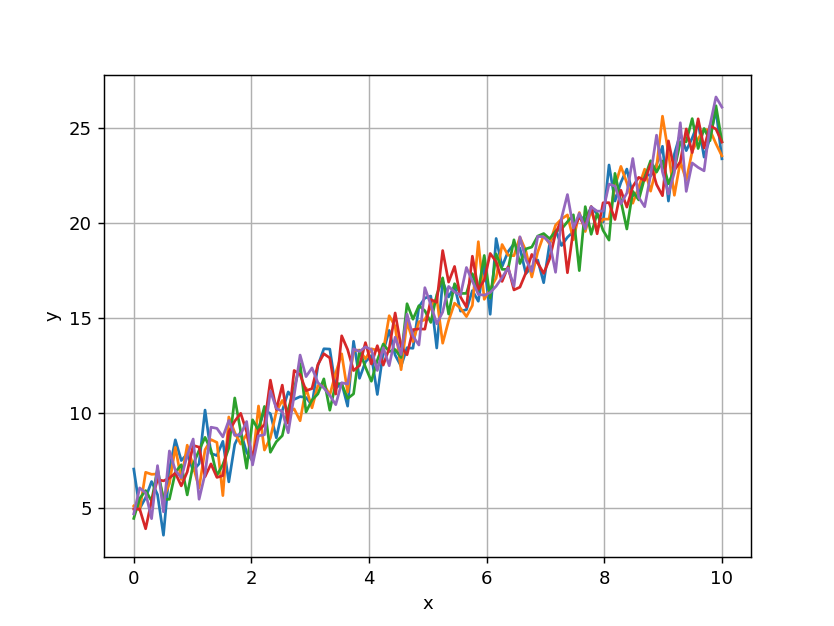

In [57]:
plt.figure()
for i in range(5):
    data = create_data()
    plt.plot(data.x, data.y)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [58]:
N = 100 # Number of files to create
workdir = "dataset"
dataset = []
for i in range(N):
    dataset.append(create_data())

In [59]:
# FOLDER CREATION
if workdir not in os.listdir("./"):
    print("creating workdir")
    os.mkdir(workdir)

In [60]:
for i in range(N):
    data = dataset[i]
    data.to_csv(workdir + "/data_{0}.csv".format( str(i).zfill(3)))

In [61]:
os.listdir("./")

['csv_batch_processing.ipynb',
 'Hello',
 'dataset',
 'jupyter_demo.ipynb',
 'scientific_plot.ipynb',
 '.ipynb_checkpoints',
 'game_of_life.ipynb']

In [62]:
del dataset # We delete the dataset and we have to find back the information

## Part 2: Get back the data 

In [76]:
workdir = "dataset"
file_names = os.listdir(workdir)
dataset = {} # Empty dic
for file_name in file_names:
    if file_name.endswith(".csv"):
        dataset[file_name] = pd.read_csv(workdir + "/" + file_name, index_col = 0)
        

In [77]:
dataset.keys()

dict_keys(['data_069.csv', 'data_002.csv', 'data_008.csv', 'data_009.csv', 'data_072.csv', 'data_089.csv', 'data_000.csv', 'data_077.csv', 'data_019.csv', 'data_064.csv', 'data_033.csv', 'data_045.csv', 'data_018.csv', 'data_004.csv', 'data_029.csv', 'data_070.csv', 'data_057.csv', 'data_065.csv', 'data_013.csv', 'data_037.csv', 'data_011.csv', 'data_044.csv', 'data_076.csv', 'data_068.csv', 'data_080.csv', 'data_098.csv', 'data_035.csv', 'data_021.csv', 'data_061.csv', 'data_032.csv', 'data_005.csv', 'data_071.csv', 'data_041.csv', 'data_053.csv', 'data_097.csv', 'data_079.csv', 'data_096.csv', 'data_091.csv', 'data_026.csv', 'data_099.csv', 'data_006.csv', 'data_060.csv', 'data_093.csv', 'data_042.csv', 'data_010.csv', 'data_016.csv', 'data_048.csv', 'data_025.csv', 'data_073.csv', 'data_001.csv', 'data_081.csv', 'data_094.csv', 'data_049.csv', 'data_066.csv', 'data_034.csv', 'data_043.csv', 'data_027.csv', 'data_022.csv', 'data_051.csv', 'data_028.csv', 'data_046.csv', 'data_007.csv

In [78]:
dataset['data_069.csv']

x          y
0    0.00000   5.126192
1    0.10101   4.330374
2    0.20202   5.498092
3    0.30303   5.549110
4    0.40404   6.099396
..       ...        ...
95   9.59596  24.342766
96   9.69697  24.193966
97   9.79798  22.754085
98   9.89899  25.096319
99  10.00000  24.890221

[100 rows x 2 columns]

In [79]:
dataset['data_069.csv'].head()

x         y
0  0.00000  5.126192
1  0.10101  4.330374
2  0.20202  5.498092
3  0.30303  5.549110
4  0.40404  6.099396

In [80]:
dataset['data_069.csv'].tail()

x          y
95   9.59596  24.342766
96   9.69697  24.193966
97   9.79798  22.754085
98   9.89899  25.096319
99  10.00000  24.890221

In [81]:
dataset['data_069.csv'].describe()

x           y
count  100.000000  100.000000
mean     5.000000   14.852671
std      2.930454    5.814095
min      0.000000    4.330374
25%      2.500000    9.907856
50%      5.000000   15.089128
75%      7.500000   19.691091
max     10.000000   25.096319

In [82]:
dataset['data_069.csv'].set_index("x") # Sets the "x" column as the index of the dataframe

y
x                  
0.00000    5.126192
0.10101    4.330374
0.20202    5.498092
0.30303    5.549110
0.40404    6.099396
...             ...
9.59596   24.342766
9.69697   24.193966
9.79798   22.754085
9.89899   25.096319
10.00000  24.890221

[100 rows x 1 columns]

In [101]:
list_data = []
for key, value in dataset.items():
    v = value.set_index("x")
    v.columns = [key]
    list_data.append(v)
    
pd.concat(list_data, axis = 1)

data_069.csv  data_002.csv  data_008.csv  data_009.csv  \
x                                                                  
0.00000       5.126192      5.172893      6.168706      4.831837   
0.10101       4.330374      6.281225      4.985072      4.544576   
0.20202       5.498092      4.315225      5.872187      6.680397   
0.30303       5.549110      6.387321      7.053176      3.115882   
0.40404       6.099396      5.114161      5.773017      5.590535   
...                ...           ...           ...           ...   
9.59596      24.342766     24.026317     22.192480     24.263832   
9.69697      24.193966     26.029977     23.849439     24.584137   
9.79798      22.754085     23.760233     24.148602     24.545447   
9.89899      25.096319     24.233723     25.678657     24.171244   
10.00000     24.890221     23.623625     25.309732     25.220934   

          data_072.csv  data_089.csv  data_000.csv  data_077.csv  \
x                                                                  
0.00000       5.410837      5.478387      3.709915      7.055904   
0.10101       4.783508      3.744998      4.338293      3.654381   
0.20202       6.908928      4.829037      4.803638      6.123234   
0.30303       5.991997      4.530492      6.335907      5.227445   
0.40404       6.863608      6.956233      3.395481      5.776428   
...                ...           ...           ...           ...   
9.59596      25.904805     23.705496     22.873496     25.212744   
9.69697      25.081302     22.817251     23.746577     23.847646   
9.79798      24.568851     24.894424     23.493841     24.042704   
9.89899      23.280909     27.401113     23.800638     23.829812   
10.00000     25.023866     24.042915     25.703371     26.184427   

          data_019.csv  data_064.csv  ...  data_020.csv  data_039.csv  \
x                                     ...                               
0.00000       4.304761      6.186798  ...      5.604244      5.775445   
0.10101       4.563316      1.353506  ...      3.596309      4.520374   
0.20202       7.685807      4.477774  ...      6.002085      4.576621   
0.30303       4.813556      6.523901  ...      6.386738      5.212938   
0.40404       4.830878      7.443445  ...      6.086374      5.805869   
...                ...           ...  ...           ...           ...   
9.59596      23.875177     23.696471  ...     21.008215     25.221964   
9.69697      24.677973     25.104431  ...     24.308333     23.302908   
9.79798      24.429055     24.004539  ...     25.833680     23.951231   
9.89899      24.544106     24.748194  ...     25.334793     25.183495   
10.00000     25.035340     23.370513  ...     24.917434     25.390315   

          data_086.csv  data_082.csv  data_017.csv  data_040.csv  \
x                                                                  
0.00000       4.230602      5.453209      2.677785      5.866575   
0.10101       5.380307      4.816382      3.746722      5.101366   
0.20202       6.356010      4.727955      5.463107      7.215577   
0.30303       7.606686      6.766667      3.569379      5.135072   
0.40404       6.157728      5.869490      5.380570      5.069817   
...                ...           ...           ...           ...   
9.59596      22.800594     22.890679     24.021191     23.727988   
9.69697      24.046825     23.387985     26.143861     24.300914   
9.79798      25.425058     26.714317     24.731700     25.024303   
9.89899      24.514343     25.759648     24.511648     27.102913   
10.00000     24.880533     23.308811     24.946396     22.335923   

          data_067.csv  data_078.csv  data_090.csv  data_036.csv  
x                                                                 
0.00000       5.026225      5.416141      6.176829      5.243241  
0.10101       4.372150      5.205744      4.453304      6.280294  
0.20202       6.912499      4.750666      5.340077      6.135077  
0.30303       6.700286      4.719083      7.323316      6.741635  
0.4

In [102]:
mean_data = pd.concat(list_data, axis = 1).mean(axis = 1)
std_data = pd.concat(list_data, axis = 1).std(axis = 1)

<IPython.core.display.Javascript object>


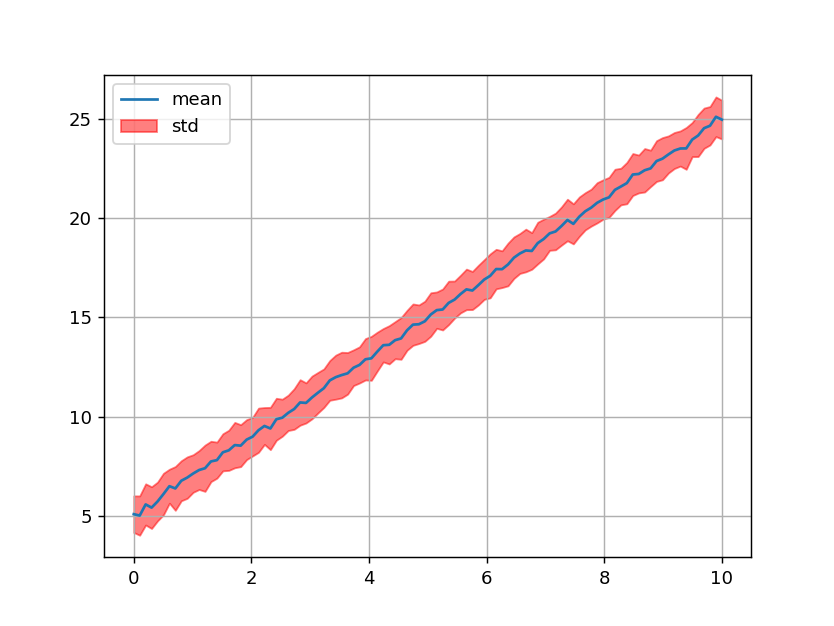

In [104]:
plt.figure()
plt.plot(mean_data.index, mean_data.values, label = "mean")
plt.fill_between(mean_data.index, 
                 mean_data.values - std_data.values, 
                 mean_data.values + std_data.values, 
                 label = "std",
                 color = "red",
                 alpha= .5) # Alpha means transparency

plt.legend(loc = "best")
plt.grid()

# Various questions

* Iterate over a dict:


In [98]:
d = {"a": 1, "b": 7, "hello": 10}
d

{'a': 1, 'b': 7, 'hello': 10}

In [99]:
for key, value in d.items():
    print(key, value)

a 1
b 7
hello 10
